**Jiayang's Part**

**Questions:**
```
1.What nonprofits have received grants and where are they based (geo?
    From the data, we can see that boston recevied most amount of the grants.
2.What recipients and Who is giving to nonprofits with recipient subject codes or population served codes corresponding to African and Latin American descent?
    
```

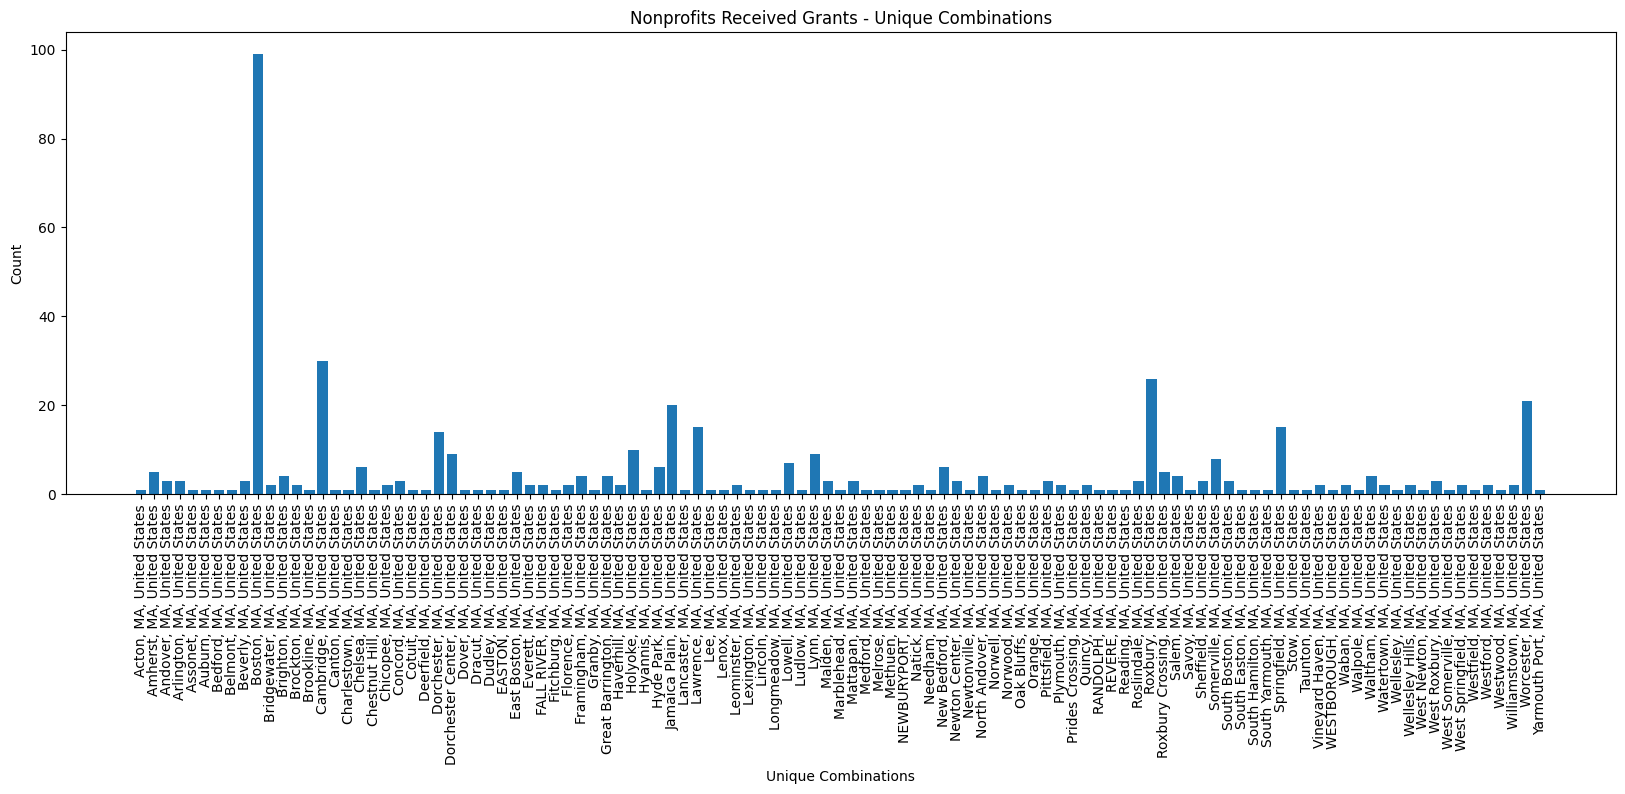

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
  
Grants = pd.read_csv('../../Data/Grants.csv', low_memory=False)

african_descent_code = 'PE030000'
latin_american_descent_code = 'PE050000'

# Nonprofits that have received grants and their locations
nonprofits_received_grants = Grants[['recip_name', 'recip_city', 'recip_state', 'recip_country']].drop_duplicates()
counts = nonprofits_received_grants.groupby(['recip_city', 'recip_state', 'recip_country']).size().reset_index(name='count')


# Recipients serving populations of African and Latin American descent
recipients_serving_specific_populations = Grants[
    (Grants['recip_subject_code'].str.contains(african_descent_code)) | 
    (Grants['recip_population_code'].str.contains(latin_american_descent_code)) |
    (Grants['recip_subject_code'].str.contains(latin_american_descent_code)) | 
    (Grants['recip_population_code'].str.contains(african_descent_code))
][['recip_name', 'recip_city', 'recip_state', 'recip_country', 'gm_name', 'recip_name']].drop_duplicates()
ALRecip = recipients_serving_specific_populations.groupby(['recip_name'])
ALGrantMaker = recipients_serving_specific_populations.groupby(['recip_name'])

plt.figure(figsize=(20, 6))
plt.bar(range(len(counts)), counts['count'], tick_label=counts.apply(lambda x: f"{x['recip_city']}, {x['recip_state']}, {x['recip_country']}", axis=1))
plt.xticks(rotation=90)
plt.xlabel('Unique Combinations')
plt.ylabel('Count')
plt.title('Nonprofits Received Grants - Unique Combinations')
plt.show()

In [ ]:
import pandas as pd
  
base_bundle = pd.read_csv('sp24-team-b\Base_bundle.csv', low_memory=False)


# Step 1: Filter organizations with recipient subject codes for people of African and Latin American descent
filtered_nonProfit = base_bundle[base_bundle['pcs_population'].str.contains('PE030000|PE050000', na=False)]
print(filtered_nonProfit.head(10))


# Step 2: Calculate total contributions and revenue
total_contributions = filtered_nonProfit['CONTRIB_ALL'].sum()

# prin"Filtered_non profit" + t(filtered_nonProfit['total_revenue'])
 
total_revenue = filtered_nonProfit['total_revenue'].sum()

# Display the results
# print("Total Contributions of nonprofit organizations for African and Latin American descent:", total_contributions)
print("Total Revenue of nonprofit organizations for African and Latin American descent:", total_revenue)
